# Import script and required dependencies (RWI Algorithm)

In [13]:
#required 3rd party packages for synthesis script
import numpy as np 
import pandas as pd
from tqdm import tqdm

import synthesis

# Load dataframe from file (eg .csv)

In [14]:
#read in the data from the csv
dataset = pd.read_csv("data.csv")
#convert datetime column to datetime objects
dataset["datetime"] = pd.to_datetime(dataset["datetime"])

# Show layout of data

In [15]:
dataset.head()

,datetime,moteid,realworld,randwalk,drift,realworld_trustscore,randwalk_trustscore,drift_trustscore
0,2004-02-28 00:59:16.027850,1.0,19.9884,20.220567,19.941908,1.0,0.0,0.0
1,2004-02-28 01:03:16.333930,1.0,19.3024,20.112081,19.276540,1.0,0.0,0.0
2,2004-02-28 01:06:16.013453,1.0,19.1652,20.170665,19.249080,1.0,0.0,0.0
3,2004-02-28 01:06:46.778088,1.0,19.1750,20.171968,19.247725,1.0,0.0,0.0
4,2004-02-28 01:08:45.992524,1.0,19.1456,20.148636,19.196851,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2313148,2004-04-05 01:27:42.244832,58.0,19.9002,19.871967,22.031741,1.0,0.0,0.0
2313149,2004-04-05 06:00:20.641618,58.0,18.5380,19.126092,22.938351,1.0,0.0,0.0
2313150,2004-04-05 06:00:46.627921,58.0,18.5478,18.565029,25.177315,1.0,0.0,0.0
2313151,2004-04-05 10:33:26.112499,58.0,25.1040,25.127949,29.960368,1.0,0.0,0.0


# Create new dataframe using RWI algorithm that includes the new "synthetic" column

It is suggested to play around with the step deviation (stepdev) and scaling (scale). Observing the ouput signal can give indication of a close 'fit' to the source data. If the synthesised data fits too closely then it may be impossible to differentiate source and synthetic data.

Point selection can have evenly spaced points in a time window, or randomly selected points (no duplicates). Use "even" or "random" to specify this for the point selection argument (even by default).

In [19]:
synthetic_data = synthesis.rwi_all_days(dataset, #dataset to be used
                            "realworld",  #the column we synthesise data from
                            stepdev=dataset.realworld.std()/8, #deviation of the step size
                            scale=0.25,   #scaling factor applied before noise and rotation
                            noise=0.1,    #noise factor applied after scaling and rotation
                            num_points=12,#number of points we 'infit' between
                            point_selection="even") # method of selecting points to infit between ("even" or "random")

100%|██████████| 54/54 [00:11<00:00,  4.71it/s]


# Show output

In [17]:
synthetic_data

,datetime,moteid,realworld,randwalk,drift,realworld_trustscore,randwalk_trustscore,drift_trustscore,synthetic
0,2004-02-28 00:59:16.027850,1.0,19.9884,20.220567,19.941908,1.0,0.0,0.0,20.184465
1,2004-02-28 01:03:16.333930,1.0,19.3024,20.112081,19.276540,1.0,0.0,0.0,20.088090
2,2004-02-28 01:06:16.013453,1.0,19.1652,20.170665,19.249080,1.0,0.0,0.0,19.965190
3,2004-02-28 01:06:46.778088,1.0,19.1750,20.171968,19.247725,1.0,0.0,0.0,20.152981
4,2004-02-28 01:08:45.992524,1.0,19.1456,20.148636,19.196851,1.0,0.0,0.0,19.895561
...,...,...,...,...,...,...,...,...,...
2313148,2004-04-05 01:27:42.244832,58.0,19.9002,19.871967,22.031741,1.0,0.0,0.0,19.900200
2313149,2004-04-05 06:00:20.641618,58.0,18.5380,19.126092,22.938351,1.0,0.0,0.0,18.538000
2313150,2004-04-05 06:00:46.627921,58.0,18.5478,18.565029,25.177315,1.0,0.0,0.0,18.547800
2313151,2004-04-05 10:33:26.112499,58.0,25.1040,25.127949,29.960368,1.0,0.0,0.0,25.104000


# Graph 28/2/2004 mote 1 to demonstrate difference between synthetic and original

<AxesSubplot:xlabel='datetime'>

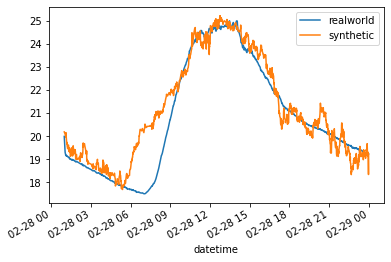

In [18]:
from datetime import date
filtered = synthetic_data[(synthetic_data.moteid == 1) & (synthetic_data.datetime.dt.date == date(2004, 2, 28))]
filtered.plot(x="datetime", y=["realworld", "synthetic"])

Now you can rename the sythetic column (if desired) and save to file (eg synthetic_data.to_csv("new_df.csv"))
note that the provided data has a "randwalk" column which has previously been generated using RWI (random walk infitting)

You can also copy the code used in this example notebook to synthesise as many types of data as you like, import the script to your own program or copy the class directly from source and use it how you like.